In [36]:
from altaipony.ffd import FFD

import numpy as np
import matplotlib.pyplot as plt
import pandas
import pathlib
from altaipony.ffd import FFD, generate_random_power_law_distribution
%matplotlib inline
for att in ['axes.labelsize', 'axes.titlesize', 'legend.fontsize',
            'legend.fontsize', 'xtick.labelsize', 'ytick.labelsize']:
    plt.rcParams[att] = 16

#### This notebook helps to plot individual star FDD.

For specific star, in the cell below, we plot ED in x-axis against the cummulative flare frequency in y-axis. The secondary x-axis on top of the graph represents specific star energy.

91
89


,name,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,...,ed_ratio_std,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,luminosity quiscent,flare_erg,flare_erg_rec
36,Kepler-28,21814,21817,1867015,1867018,1388.445537,1388.447580,0.995768,0.181206,0.005911,...,0.558996,0.162346,3.431335,0.404651,0.909442,0.001235,0.002863,1.731364e+32,1.724037e+32,2.760311e+32
0,Kepler-28,37788,37791,1290834,1290837,995.997852,995.999896,0.999977,0.154115,0.007122,...,0.216925,0.145662,1.038097,0.397343,0.390875,0.001560,0.000953,1.731364e+32,1.731325e+32,2.866996e+32
30,Kepler-28,3138,3141,1848193,1848196,1375.625937,1375.627981,1.064037,0.185529,0.006180,...,0.558996,0.162346,3.431335,0.404651,0.970211,0.001291,0.002863,1.731364e+32,1.842236e+32,2.949556e+32
29,Kepler-28,3044,3047,1848099,1848102,1375.561914,1375.563957,1.072977,0.185536,0.006568,...,0.558996,0.162346,3.431335,0.404651,0.978067,0.001372,0.002863,1.731364e+32,1.857714e+32,2.974338e+32
37,Kepler-28,21914,21917,1867115,1867118,1388.513647,1388.515690,1.081563,0.181264,0.006413,...,0.558996,0.162346,3.431335,0.404651,0.984818,0.001340,0.002863,1.731364e+32,1.872580e+32,2.998139e+32
39,Kepler-28,22004,22007,1867205,1867208,1388.574945,1388.576988,1.090766,0.180054,0.007249,...,0.558996,0.162346,3.431335,0.404651,0.992694,0.001514,0.002863,1.731364e+32,1.888512e+32,3.023649e+32
34,Kepler-28,21762,21765,1866963,1866966,1388.410120,1388.412163,1.091772,0.181020,0.006664,...,0.558996,0.162346,3.431335,0.404651,0.993755,0.001392,0.002863,1.731364e+32,1.890253e+32,3.026436e+32
42,Kepler-28,22054,22057,1867255,1867258,1388.609000,1388.611043,1.092380,0.180394,0.007056,...,0.558996,0.162346,3.431335,0.404651,0.994177,0.001474,0.002863,1.731364e+32,1.891307e+32,3.028124e+32
84,Kepler-28,28608,28611,1873867,1873870,1393.112392,1393.114435,1.126069,0.181512,0.007109,...,0.558996,0.162346,3.431335,0.404651,1.024039,0.001485,0.002863,1.731364e+32,1.949635e+32,3.121510e+32
2,Kepler-28,23000,23003,1636747,1636750,1231.603906,1231.605950,1.143379,0.167424,0.007303,...,0.190914,0.161337,1.205902,0.344380,0.386443,0.001579,0.000964,1.731364e+32,1.979605e+32,3.158588e+32


Setting ED with new values, size 89.
Setting frequency values with new values, size 89.
Setting frequency adjusted count values with new values, size 89.


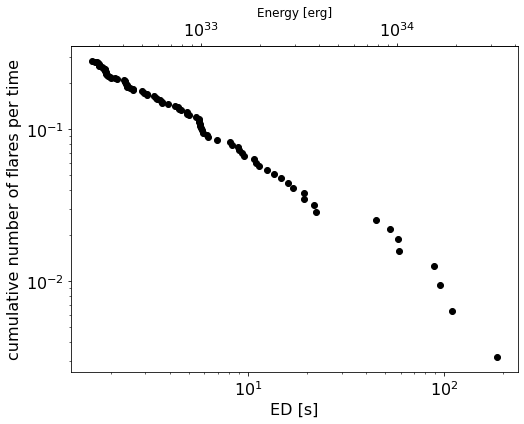

In [99]:
fig, ax = plt.subplots(figsize=(8, 6))
data = pandas.read_pickle(f"../data/all_flares.pkl")

name = "Kepler-28" # change for any star name in the M dwarfs sample

data1 = data.query(f"`name` == '{name}'")
print(len(data1))
atime=data1["tstart"].max()-data1["tstop"].min()
data1= data1.query("`ed_ratio`.notna()&`ed_corr`.notna()&`recovery_probability`.notna()")
# data1= data1.query("`flare_erg_rec`>1e31")
print(len(data1))
data1 = data1.reset_index()
data1 = data1.drop(["index"], axis=1)

display(data1.sort_values("ed_corr").head(10))
simple_ffd = FFD(f=data1,ID="name", tot_obs_time=atime)

ed, freq, counts = simple_ffd.ed_and_freq(energy_correction=True,
                                         recovery_probability_correction=True,)
ax.scatter(ed, freq, c="k")
energy = data1.at[0,"luminosity quiscent"]
def deg2rad(x):
    return x * energy
def rad2deg(x):
    return x / energy
ax1 = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))


ax1.set_xlabel("Energy [erg]", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per time");


#### The cell below fit MMLE and finds $\alpha$ and $\beta$ for specific star.
The cell fits a power law to the Flare Frequency distribution. The 'mcmc' model is preferable and follows [Wheatland (2004)](https://ui.adsabs.harvard.edu/abs/2004ApJ...609.1134W/abstract) using Markov chain Monte Carlo method, and sampling from the joint posterior distribution in their equation [24] with a constant prior. The log-likelihood function can be found in `altaipony.wheatland.loglikelihood_uniform_wheatland`.
There is other available mode ("mmle") for quick estimates.
The cell also fits $\beta$  via linear least squares to a power law with given alpha using the cumulative FFD and estimate uncertainty using jackknife algorithm.

In [100]:
simple_ffd.fit_powerlaw("mcmc") # more quick but less accurate method is "mmle"
print(f"alpha = {simple_ffd.alpha:.2f} +/- {simple_ffd.alpha_err:.2f}")
simple_ffd.fit_beta_to_powerlaw()

print(f"beta = {simple_ffd.beta:.2f} +/- {simple_ffd.beta_err:.4f}")

100%|██████████| 500/500 [00:04<00:00, 100.94it/s]


alpha = 1.84 +/- 0.10
beta = 0.35 +/- 0.0349


Below we plot the same distribution with fitted power law, represented by the red curve, orange curve is for intrinsic $\alpha$.

,name,istart,istop,cstart,cstop,tstart,tstop,ed_rec,ed_rec_err,ampl_rec,...,ed_ratio_std,amplitude_ratio_std,duration_ratio_std,recovery_probability_std,ed_corr_err,amplitude_corr_err,duration_corr_err,luminosity quiscent,flare_erg,flare_erg_rec
0,Kepler-28,37788,37791,1290834,1290837,995.997852,995.999896,0.999977,0.154115,0.007122,...,0.216925,0.145662,1.038097,0.397343,0.390875,0.001560,0.000953,1.731364e+32,1.731325e+32,2.866996e+32
1,Kepler-28,8882,8885,1403172,1403175,1072.510330,1072.512374,1.574260,0.183320,0.010148,...,0.183424,0.149908,1.067223,0.419468,0.561247,0.002136,0.001409,1.731364e+32,2.725617e+32,5.007107e+32
2,Kepler-28,23000,23003,1636747,1636750,1231.603906,1231.605950,1.143379,0.167424,0.007303,...,0.190914,0.161337,1.205902,0.344380,0.386443,0.001579,0.000964,1.731364e+32,1.979605e+32,3.158588e+32
3,Kepler-28,489,494,1792220,1792227,1337.502366,1337.507134,7.465870,0.322714,0.023431,...,0.199055,0.159207,1.221125,0.389652,2.956158,0.005714,0.003711,1.731364e+32,1.292614e+33,2.555877e+33
4,Kepler-28,2206,2321,1847261,1847376,1374.991153,1375.069480,55.675118,1.125521,0.014577,...,0.558996,0.162346,3.431335,0.404651,49.841582,0.003045,0.109762,1.731364e+32,9.639387e+33,1.543338e+34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,Kepler-28,28608,28611,1873867,1873870,1393.112392,1393.114435,1.126069,0.181512,0.007109,...,0.558996,0.162346,3.431335,0.404651,1.024039,0.001485,0.002863,1.731364e+32,1.949635e+32,3.121510e+32
85,Kepler-28,28628,28634,1873887,1873893,1393.126013,1393.130100,2.282304,0.255315,0.007826,...,0.558996,0.162346,3.431335,0.404651,2.058542,0.001635,0.005727,1.731364e+32,3.951499e+32,6.326643e+32
86,Kepler-28,28667,28676,1873926,1873935,1393.152576,1393.158706,3.625962,0.288829,0.013784,...,0.558996,0.162346,3.431335,0.404651,3.258041,0.002879,0.008590,1.731364e+32,6.277859e+32,1.005132e+33
87,Kepler-28,28694,28697,1873953,1873956,1393.170966,1393.173009,1.214108,0.180854,0.008094,...,0.558996,0.162346,3.431335,0.404651,1.101566,0.001691,0.002863,1.731364e+32,2.102062e+32,3.365557e+32


Setting ED with new values, size 89.
Setting frequency values with new values, size 89.
Setting frequency adjusted count values with new values, size 89.


Flare rate:1.8845551981422939
ed cutoff:0.25355737373770754


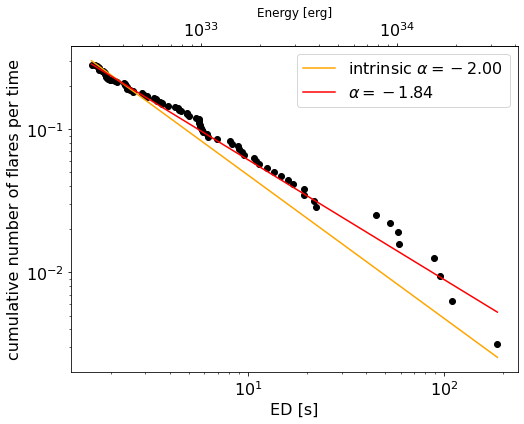

In [101]:
fig, ax = plt.subplots(1, figsize=(8,6))
g=-1.0
display(data1)
simple_ffd2 = FFD(f=data1,ID="name", tot_obs_time=atime)

simple_ffd2.ed_and_freq(energy_correction=True,
                       recovery_probability_correction=True
                       )

simple_ffd2.alpha, simple_ffd2.alpha_err = -g + 1, .1

simple_ffd2.fit_beta_to_powerlaw()

simple_ffd2.plot_powerlaw(ax, c="orange", label=fr"intrinsic $\alpha=-{simple_ffd2.alpha:.2f}$")

ax.scatter(ed, freq, c="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_xlabel("ED [s]")
ax.set_ylabel("cumulative number of flares per time")
simple_ffd.plot_powerlaw(ax, c="r", label=fr'$\alpha=-{simple_ffd.alpha:.2f}$')

energy = data1.at[0,"luminosity quiscent"]
def deg2rad(x):
    return x * energy
def rad2deg(x):
    return x / energy
ax1 = ax.secondary_xaxis('top', functions=(deg2rad, rad2deg))
ed_cutoff = 4.39e31/energy
rate = simple_ffd2.beta/ (np.abs(simple_ffd2.alpha - 1.))* ed_cutoff ** (1 - simple_ffd2.alpha)
print(f"Flare rate:{rate}")
print(f"ed cutoff:{ed_cutoff}")


ax1.set_xlabel("Energy [erg]", fontsize=12)


plt.xscale("log")
plt.yscale("log")
plt.xlabel("ED [s]")
plt.ylabel("cumulative number of flares per time");
plt.legend();